<a href="https://colab.research.google.com/github/jacquelineangeles/Jacquelienangeles/blob/main/LAb_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: MUSCLE PHYSIOLOGY

purpose:
The myology experiment aims to understand the specific traits of skeletal, cardiac, and smooth muscles, exploring differences in innervation, contraction rates, fatigue resistance, and responses to neurotransmitters. It involves analyzing how acetylcholine and norepinephrine affect the contraction rates of cardiac and smooth muscles, recording electromyograms (EMGs) to study electrical signals guiding muscle contractions, and examining the impact of oxygen availability on skeletal muscle function. The objective is to gain insights into the distinctive contraction characteristics of various muscle types and their responses to different stimuli.

Procedure:


1. Ensured the IWX/214 unit is plugged in and connected to the laptop via USB cable.

2. Connected the C-AAMI-504 EEG cable to the isolated inputs of Channels 1 and 2 of the IWX/214. Confirmed correct insertion of color-coded lead wires into the lead pedestal. Plug the connectors on electrode lead wires into the matching sockets on the lead pedestal of the ECG cable.

3. Turned on the laptop first, allowing it to fully boot up, then turned on the IWX/214 unit. Confirmed the red indicator light is on.
Opened the Labscribe3 program by clicking its icon on the desktop. Click "OK" when the window says “Hardware found IWX214:2008-1-24”.

4. Clicked on the "Settings" tab in the second row and selected the “Human Muscle” tab. Within it, choose the “AntagonisticMuscle” tab and closed the unnecessary pdf file.

5. Instructed the subject to remove arm and wrist jewelry. Cleaned the forearm skin with an alcohol swab and let it dry. Applied disposable electrodes to six locations on the forearm as follows: +2, -2 on the posterior, and +1, -1, and ground on the anterior. Attached lead wires accordingly.

6. Recorded an EMG for forearm muscles, illustrating agonistic and antagonistic activity for each exercise. Type the student’s name and the corresponding letter for the activity (A, B, C, D) in the Mark box. Clicked the red “Rec” button to start recording and pressed Enter to mark the beginning of each activity. Repeated for each exercise.  

7. Gently flexed the wrist with the palm open and hold for four seconds. Return the wrist to a neutral position. Extended the wrist, again with the palm open, and
hold for four seconds. Repeated several times.

8. Forcefully flexed the wrist with the hand closed into a fist, hold for four seconds.

9. Return to a neutral position. Extended the wrist maintaining the fist and hold forfour seconds. Repeat several times.

10. Attempted to flex the wrist against resistance applied by another student for 10
seconds.

11. Placed the hand in mid-supination and make a fist. Attempted to move the hand upwards against resistance applied by another student. Hold for 10 seconds.


E)
1. Firmly squeezed a tennis ball as rapidly as possible withnon-dominant handuntil you feel fatigued can no longer squeeze it. Record the duration of this effort.

2. Had partner attach a sphygmomanometer cuff to dominant arm and inflate it to 150 mmHg, or 10 mmHg above normal systolic pressure, if you know blood
pressure values.

3. Repeated the squeezing exercise with dominant arm. Recorded the time duration of this effort. (NOTE: it is important to stop at the same sensation of fatigue, or “burn,” as the
non-dominant arm.)

4. Evaluated the differences between the two duration measurements obtained in terms of energy demands of skeletal muscle and fatigue.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv (r'/content/example_export (1).txt', sep = '\t')
df

,Time,EMG
0,0.000,0.000000
1,0.001,0.000000
2,0.002,0.000000
3,0.003,0.000000
4,0.004,0.000000
...,...,...
56795,56.795,0.091024
56796,56.796,0.210582
56797,56.797,0.118342
56798,56.798,-0.171094


Text(0, 0.5, 'EMG (Volts)')

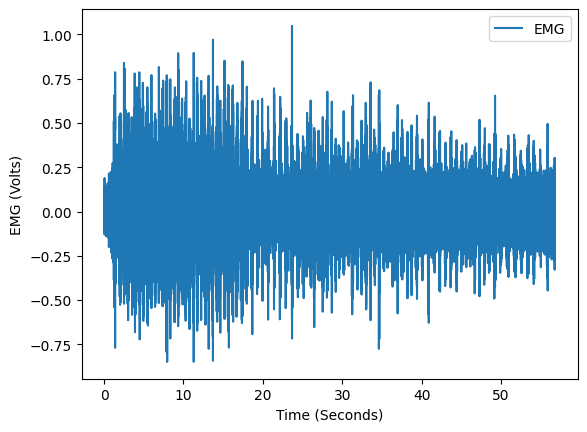

In [ ]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [ ]:
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10  # Step size in seconds (how often you want to check the window size)

In [ ]:
max_values = []
time_intervals = []

# Iterate through the data in steps
for i in range(0, len(df), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(df):
        window_data = df.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals
result_df = pd.DataFrame({'Time': time_intervals, 'MaxEMG': max_values})

# Calculate the percentage of max EMG for each 0.5 seconds interval
result_df['MaxEMG_percent'] = (result_df['MaxEMG'] / result_df['MaxEMG'].max()) * 100

# Display the result
print(result_df)

      Time    MaxEMG  MaxEMG_percent
0   1.4995  0.839139       93.689667
1  11.4995  0.895658      100.000000
2  21.4995  0.695603       77.663907
3  31.4995  0.656789       73.330334
4  41.4995  0.614526       68.611680
5  51.4995  0.434579       48.520641


In [ ]:
threshold = 70

In [ ]:
reached_threshold = result_df[result_df['MaxEMG_percent'] <= threshold]
time_at_threshold = reached_threshold['Time'].iloc[0]
print(f"Time at ~{threshold} % of max: {time_at_threshold} seconds")

Time at ~70 % of max: 41.4995 seconds


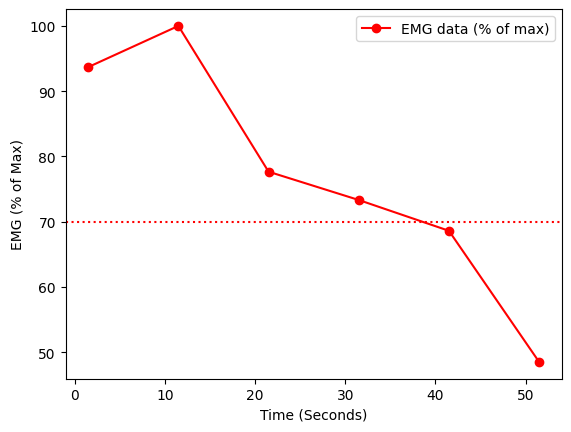

In [ ]:
fig, ax = plt.subplots()
result_df.plot.line(ax = ax, y = 'MaxEMG_percent', x = 'Time', color = 'r', marker = 'o')
L=plt.legend()
L.get_texts()[0].set_text('EMG data (% of max)')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

9-E: The effect of oxygen supply on skeletal muscle activity

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dfr = pd.read_csv (r'/content/J_Right.txt', sep = '\t')
dfr

,Time,EMG,Muscle Force
0,0.000,0.000000,0.445479
1,0.001,0.000000,0.445479
2,0.002,0.000000,0.445479
3,0.003,0.000000,0.445479
4,0.004,0.000000,0.445479
...,...,...,...
240955,240.955,-0.065143,0.445479
240956,240.956,-0.214461,0.445479
240957,240.957,-0.054865,0.445479
240958,240.958,0.147321,0.445479


In [ ]:
dfl = pd.read_csv (r'/content/J_Left.txt', sep = '\t')
dfl

,Time,EMG,Muscle Force
0,0.000,0.000000,0.445853
1,0.001,0.000000,0.445853
2,0.002,0.000000,0.445853
3,0.003,0.000000,0.445853
4,0.004,0.000000,0.445853
...,...,...,...
247067,247.067,-0.254999,0.446600
247068,247.068,-0.053347,0.446600
247069,247.069,0.150930,0.446600
247070,247.070,0.235381,0.446600


Text(0, 0.5, 'EMG (Volts)')

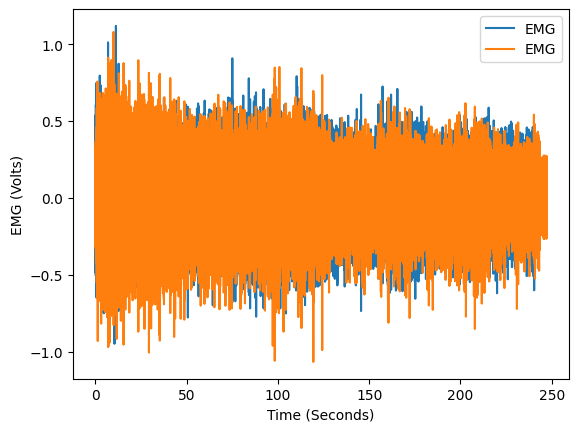

In [ ]:
fig, ax = plt.subplots()
dfr.plot.line(ax = ax, y = 'EMG', x = 'Time')
dfl.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [ ]:

window_size = 10
step_size = 10

In [ ]:
max_values_r = []
time_intervals_r = []

max_values_l = []
time_intervals_l = []


for i in range(0, len(dfr), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfr):
        window_data = dfr.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_r.append(max_value)


        time_interval = window_data['Time'].mean()
        time_intervals_r.append(time_interval)


result_df_r = pd.DataFrame({'Time': time_intervals_r, 'MaxEMG_R': max_values_r})


for i in range(0, len(dfl), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfl):
        window_data = dfl.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_l.append(max_value)


        time_interval = window_data['Time'].mean()
        time_intervals_l.append(time_interval)

result_df_l = pd.DataFrame({'Time': time_intervals_l, 'MaxEMG_L': max_values_l})


result_df_r['MaxEMG_percent_R'] = (result_df_r['MaxEMG_R'] / result_df_r['MaxEMG_R'].max()) * 100
result_df_l['MaxEMG_percent_L'] = (result_df_l['MaxEMG_L'] / result_df_l['MaxEMG_L'].max()) * 100


print(result_df_r)
print(result_df_l)

        Time  MaxEMG_R  MaxEMG_percent_R
0     4.9995  1.011900         90.437845
1    14.9995  1.118890        100.000000
2    24.9995  0.518866         46.373281
3    34.9995  0.650892         58.173011
4    44.9995  0.631618         56.450411
5    54.9995  0.633092         56.582148
6    64.9995  0.584911         52.276006
7    74.9995  0.908165         81.166603
8    84.9995  0.778148         69.546425
9    94.9995  0.707078         63.194595
10  104.9995  0.613182         54.802706
11  114.9995  0.791544         70.743683
12  124.9995  0.541567         48.402166
13  134.9995  0.534971         47.812654
14  144.9995  0.672521         60.106087
15  154.9995  0.724776         64.776341
16  164.9995  0.709342         63.396938
17  174.9995  0.594825         53.162062
18  184.9995  0.498671         44.568367
19  194.9995  0.540635         48.318870
20  204.9995  0.525821         46.994879
21  214.9995  0.587172         52.478081
22  224.9995  0.496639         44.386758
23  234.9995  0.

In [ ]:
threshold = 60

In [ ]:
reached_threshold_R = result_df_r[result_df_r['MaxEMG_percent_R'] <= threshold]
time_at_threshold_R = reached_threshold_R['Time'].iloc[0]
reached_threshold_L = result_df_l[result_df_l['MaxEMG_percent_L'] <= threshold]
time_at_threshold_L = reached_threshold_L['Time'].iloc[0]
print(f"Time at ~{threshold} % of max for right hand: {time_at_threshold_R} seconds")
print(f"Time at ~{threshold} % of max for left hand: {time_at_threshold_L} seconds")

Time at ~60 % of max for right hand: 24.9995 seconds
Time at ~60 % of max for left hand: 54.9995 seconds


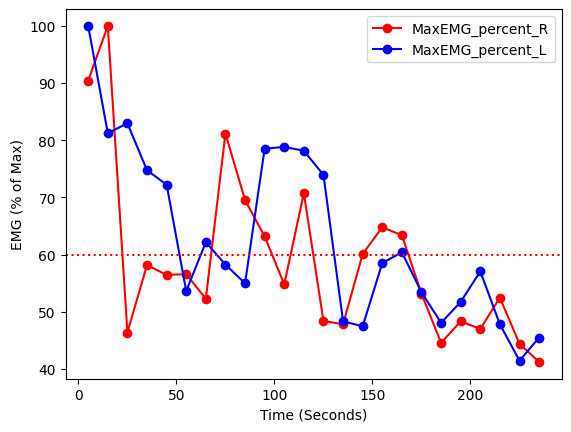

In [ ]:
fig, ax = plt.subplots()
result_df_r.plot.line(ax = ax, y = 'MaxEMG_percent_R', x = 'Time', color = 'r', marker = 'o')
result_df_l.plot.line(ax = ax, y = 'MaxEMG_percent_L', x = 'Time', color = 'b', marker = 'o')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

Text(0.5, 1.0, 'Fatigability Assay - Right vs Left Hand')

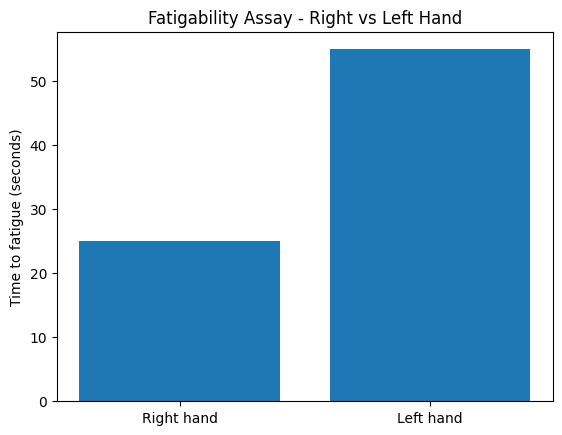

In [ ]:
plt.bar(['Right hand', 'Left hand'],[time_at_threshold_R, time_at_threshold_L])
plt.ylabel('Time to fatigue (seconds)')
plt.title('Fatigability Assay - Right vs Left Hand')

Discussion:
Analyzing the data from the initial graph, it is evident that the EMG reached its peak at 10 seconds, reaching 100% as the wrist flexion occurred. This observation indicates the highest muscle activity during the flexion movement.
 In the comparative analysis between the right and left hands during the tennis ball squeezing exercise, an interesting trend emerges. The left hand achieved 100% EMG slightly ahead of the right hand. This temporal difference in reaching maximum EMG suggests a nuanced aspect of muscle engagement between the two hands during this specific activity.
As we can see in bar graph right hand had the lowest time of fatigues where as left had had double the time compared to right hand.






Conclusion:
In conclusion, the study helps us understand how muscles work, identifying different muscle phases, recognizing muscle patterns, and explaining how chemicals affect heart and smooth muscles. The data also helps tell apart partially and fully contracted muscles, understand muscle patterns in different exercises, and see how oxygen affects muscles.